Live do discord sobre aplicações na ia - pessoal que foi p fora
https://discord.com/channels/1180279503470219275/1415806279330566278/1438301465692344532

In [15]:
import pandas as pd

In [16]:
df = pd.read_csv("./dados_sobre_casas.csv")

In [17]:
type(df)

pandas.core.frame.DataFrame

In [18]:
df.head()

,salario_medio_moradores_regiao,idade_media_casas_regiao,quantidade_media_comodos_regiao,quantidade_media_quartos_regiao,populacao_regiao,valor_casa
0,79545,5,7,4,23086,1059034
1,79248,6,6,3,40173,1505891
2,61287,5,8,5,36882,1058988
3,63345,7,5,3,34310,1260617
4,59982,5,7,4,26354,630943


In [19]:
df['valor_casa'].describe()

count    5.000000e+03
mean     1.232073e+06
std      3.531176e+05
min      1.593900e+04
25%      9.975775e+05
50%      1.232669e+06
75%      1.471210e+06
max      2.469066e+06
Name: valor_casa, dtype: float64

<Axes: ylabel='Frequency'>

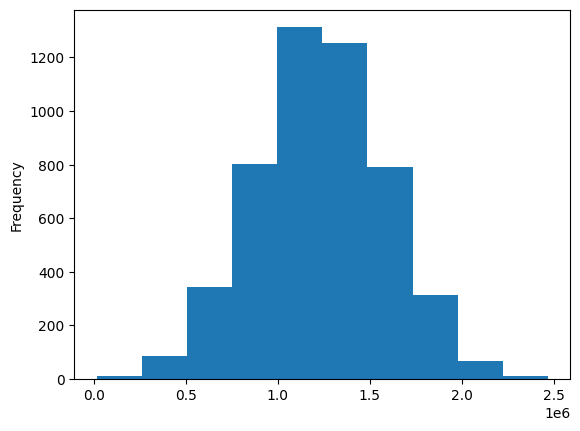

In [20]:

df['valor_casa'].plot(kind='hist')

<Axes: ylabel='Frequency'>

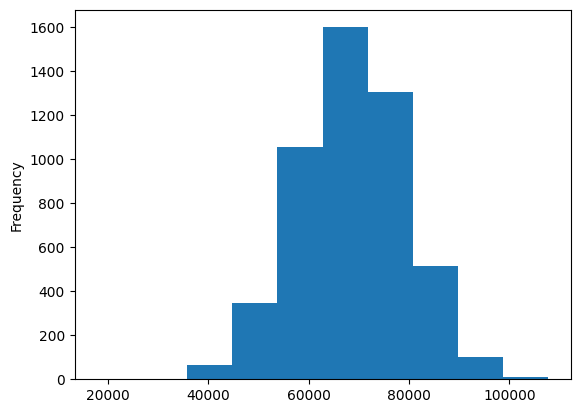

In [22]:
df['salario_medio_moradores_regiao'].plot(kind='hist')

<Axes: >

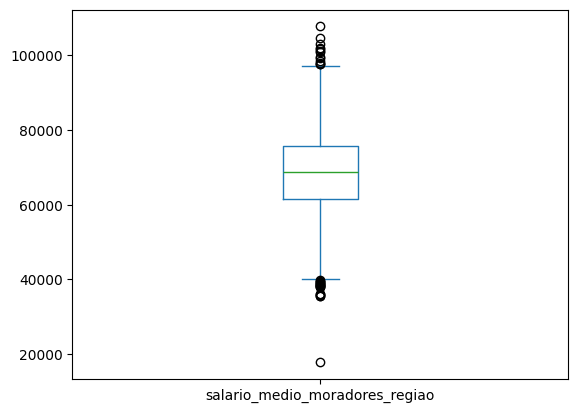

In [23]:
df['salario_medio_moradores_regiao'].plot(kind='box')

In [27]:
df['salario_medio_moradores_regiao'].describe()

count      5000.000000
mean      68582.614400
std       10657.985126
min       17796.000000
25%       61480.250000
50%       68804.000000
75%       75783.000000
max      107701.000000
Name: salario_medio_moradores_regiao, dtype: float64

array([[<Axes: title={'center': 'salario_medio_moradores_regiao'}>,
        <Axes: title={'center': 'idade_media_casas_regiao'}>],
       [<Axes: title={'center': 'quantidade_media_comodos_regiao'}>,
        <Axes: title={'center': 'quantidade_media_quartos_regiao'}>],
       [<Axes: title={'center': 'populacao_regiao'}>,
        <Axes: title={'center': 'valor_casa'}>]], dtype=object)

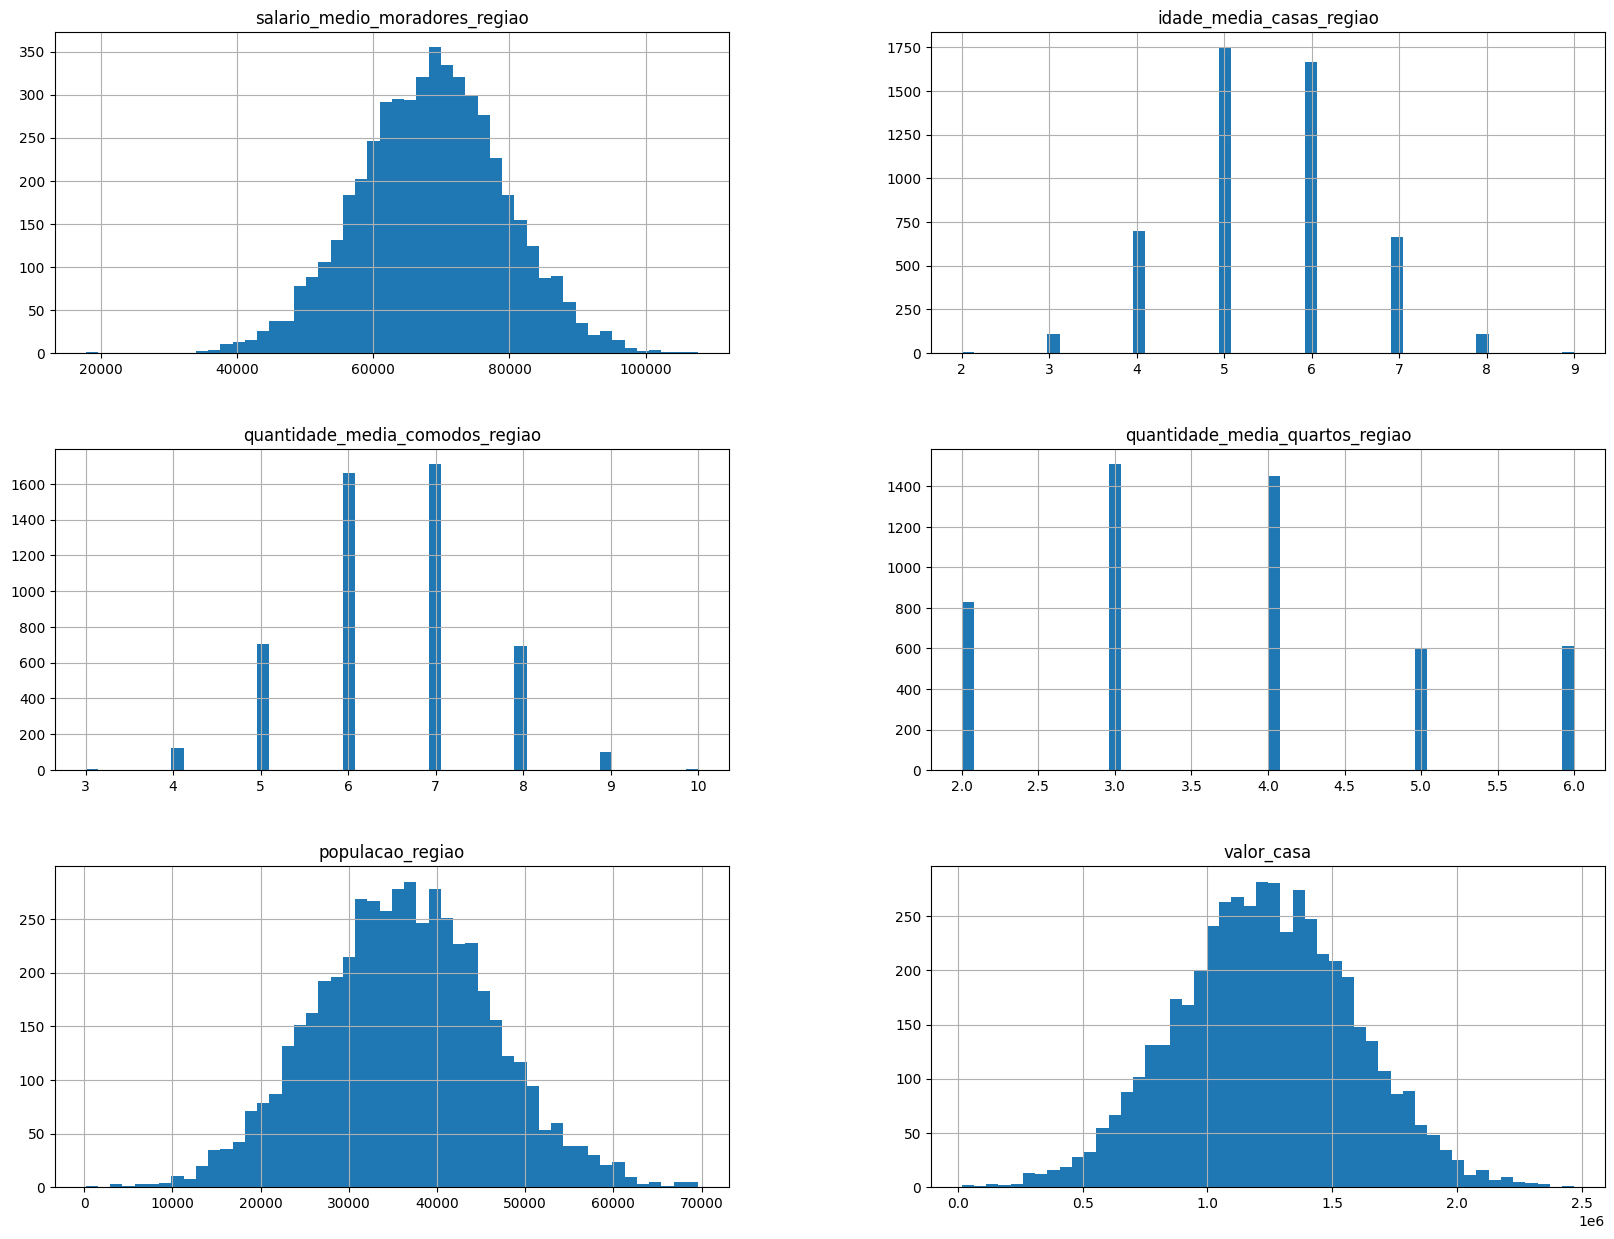

In [24]:
df.hist(bins=50, figsize=(20,15))

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   salario_medio_moradores_regiao   5000 non-null   int64
 1   idade_media_casas_regiao         5000 non-null   int64
 2   quantidade_media_comodos_regiao  5000 non-null   int64
 3   quantidade_media_quartos_regiao  5000 non-null   int64
 4   populacao_regiao                 5000 non-null   int64
 5   valor_casa                       5000 non-null   int64
dtypes: int64(6)
memory usage: 234.5 KB


<Axes: xlabel='salario_medio_moradores_regiao', ylabel='valor_casa'>

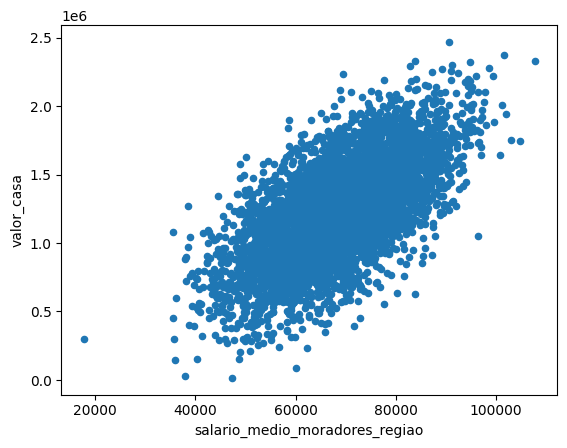

In [30]:
df.plot(kind='scatter', x='salario_medio_moradores_regiao',  y = 'valor_casa')

<Axes: xlabel='salario_medio_moradores_regiao', ylabel='valor_casa'>

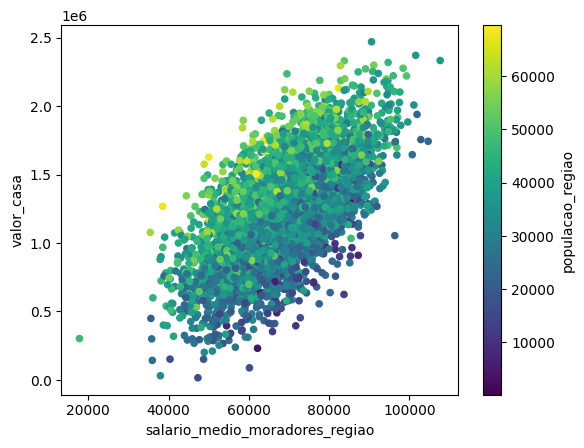

In [35]:
df.plot(kind='scatter', x='salario_medio_moradores_regiao',  y = 'valor_casa', c='populacao_regiao', colormap="viridis")

<Axes: >

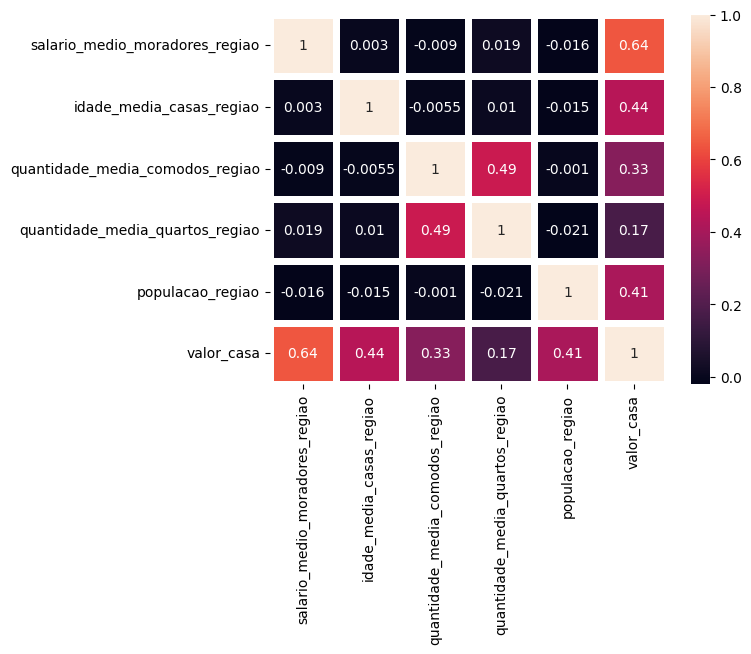

In [38]:
import seaborn as sb

correlacao = df.corr()

sb.heatmap(correlacao,annot=True,linewidths=5)

In [42]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='valor_casa')
y = df['valor_casa']

X_train,X_teste, y_train, y_teste = train_test_split(X,y, test_size=0.2, random_state=42)

In [43]:
X_train

,salario_medio_moradores_regiao,idade_media_casas_regiao,quantidade_media_comodos_regiao,quantidade_media_quartos_regiao,populacao_regiao
4227,66547,5,6,4,27850
4676,53722,6,7,3,47649
800,64838,6,8,4,32921
3671,67097,6,7,3,27191
4193,75245,8,7,3,37410
...,...,...,...,...,...
4426,76223,6,5,2,30165
466,56685,6,7,3,43322
3092,66195,6,6,3,37288
3772,58694,7,9,4,49960


In [44]:
y_train

4227    1094880
4676    1300389
800     1382172
3671    1027428
4193    1562887
         ...   
4426    1023944
466     1223101
3092    1318598
3772    1708631
860     1060898
Name: valor_casa, Length: 4000, dtype: int64

In [45]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [46]:
df.head(1)

,salario_medio_moradores_regiao,idade_media_casas_regiao,quantidade_media_comodos_regiao,quantidade_media_quartos_regiao,populacao_regiao,valor_casa
0,79545,5,7,4,23086,1059034


In [48]:
salario = 79545
idade = 5
comodos = 7
quartos = 4
populacao = 23086

teste = [salario,idade,comodos,quartos,populacao]

linear_regression.predict([teste])

/home/elisabete/git-repositórios/1python- pos-tech/venv-ml/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1253689.02336692])

In [50]:
from sklearn.ensemble import RandomForestRegressor

modelo_regressor = RandomForestRegressor()

modelo_regressor.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [51]:
modelo_regressor.predict([teste])

/home/elisabete/git-repositórios/1python- pos-tech/venv-ml/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1114994.89])

In [56]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error,mean_absolute_percentage_error

pred_modelo_1 = linear_regression.predict(X_teste)
pred_modelo_2 = modelo_regressor.predict(X_teste)



In [57]:
print(r2_score(y_teste,pred_modelo_1))
print(r2_score(y_teste,pred_modelo_2))

0.8892448945202099
0.842158490547279


In [58]:
print(mean_absolute_error(y_teste,pred_modelo_1))
print(mean_absolute_error(y_teste,pred_modelo_2))

93564.18067602241
109654.72468


In [59]:
print(mean_squared_error(y_teste,pred_modelo_1))
print(mean_squared_error(y_teste,pred_modelo_2))

13626473635.02909
19419629982.32318


In [60]:
print(mean_absolute_percentage_error(y_teste,pred_modelo_1))
print(mean_absolute_percentage_error(y_teste,pred_modelo_2))

0.08575122090340083
0.10157856840827598


In [61]:
pd.DataFrame(zip(y_teste,pred_modelo_1,pred_modelo_2),columns=['real','previsto no linear'," previsto random forest"])

,real,previsto no linear,previsto random forest
0,1339096,1.377027e+06,1353495.12
1,1251794,1.118602e+06,1143052.15
2,1340095,1.181679e+06,1256379.41
3,1431508,1.204380e+06,1179209.69
4,1042374,1.115165e+06,1091560.19
...,...,...,...
995,1107031,1.008174e+06,1093816.29
996,1405505,1.302557e+06,1338799.49
997,1924156,1.927820e+06,1940041.02
998,1571254,1.709259e+06,1767651.33
